In [121]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns; sns.set()
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # for the missing categorical variables
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


In [101]:
# YOUR CODE HERE

def answer_one_a():
    df_data = pd.read_csv("horse-colic.data", skipinitialspace = True, sep=';')
    df_data = df_data.replace('[?]',np.NaN,regex= True)
    df_data = df_data.apply(pd.to_numeric)
    return df_data
    

def answer_one_b(input_df):
    num_rows = len(df_data.index)
    num_cols = len(df_data.columns) 
    names = df_data.columns.values.tolist()
    
    return num_rows, num_cols, names

In [102]:
df_data = answer_one_a()

display(df_data)


,Surgery,Age,Hospital Number,Rectal Temperature,Pulse,Respiratory Rate,Temperature Of Extremities,Peripheral Pulse,Mucous Membranes,Capillary Refill Time,...,Packed Cell Volume,Total Protein,Abdominocentesis Appearance,Abdomcentesis Total Protein,Outcome,Surgical Lesion,Lesion 1,Lesion 2,Lesion 3,Pathology Data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2.0,1,529695,38.6,60.0,30.0,1.0,1.0,3.0,1.0,...,40.0,6.0,1.0,NaN,1,1,3205,0,0,2
364,2.0,1,528452,37.8,42.0,40.0,1.0,1.0,1.0,1.0,...,36.0,6.2,NaN,NaN,1,2,4124,0,0,2
365,1.0,1,534783,38.0,60.0,12.0,1.0,1.0,2.0,1.0,...,44.0,65.0,3.0,2.0,3,1,2209,0,0,2
366,2.0,1,528926,38.0,42.0,12.0,3.0,NaN,3.0,1.0,...,37.0,5.8,NaN,NaN,1,2,3111,0,0,2


In [103]:
num_inputs, num_raw_features, raw_feature_names = answer_one_b(df_data)
print(num_inputs)
print(num_raw_features)
print(raw_feature_names)

368
28
['Surgery', 'Age', 'Hospital Number', 'Rectal Temperature', 'Pulse', 'Respiratory Rate', 'Temperature Of Extremities', 'Peripheral Pulse', 'Mucous Membranes', 'Capillary Refill Time', 'Pain Level', 'Peristalsis', 'Abdominal Distension', 'Nasogastric Tube', 'Nasogastric Reflux', 'Nasogastric Reflux PH', 'Rectal Examination', 'Abdomen', 'Packed Cell Volume', 'Total Protein', 'Abdominocentesis Appearance', 'Abdomcentesis Total Protein', 'Outcome', 'Surgical Lesion', 'Lesion 1', 'Lesion 2', 'Lesion 3', 'Pathology Data']


In [104]:


def answer_two_a(input_df, target_column = 'Outcome'):
    X = pd.DataFrame(input_df.drop(['Outcome'], axis=1))
    y = pd.DataFrame(input_df[target_column])
    return X, y

def answer_two_b(y):
    target_number = y['Outcome'].value_counts(normalize=True)
    #1    0.611413
    #2    0.247283
    #3    0.141304
    #Name: Outcome, dtype: float64
    # Therefore data is imbalanced
    print()
    print(type(target_number))
    print()
    target_ratios = pd.Series(target_number)
    return target_ratios

def answer_two_c():

    is_imbalanced = True

    return is_imbalanced

def answer_two_d(target_ratios):
    target_ratios.plot(kind='pie')
    plt.figure()
    plt.show()
    
    return plt.gcf()



<class 'pandas.core.series.Series'>



1    0.611413
2    0.247283
3    0.141304
Name: Outcome, dtype: float64

Imbalanced


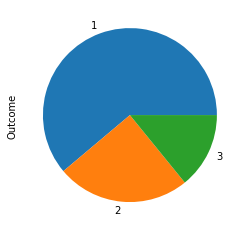

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [105]:
X_df, y_df = answer_two_a(df_data)
target_ratios = answer_two_b(y_df)
display(target_ratios)

if answer_two_c():
    print('Imbalanced')
else:
    print('Balanced')

answer_two_d(target_ratios)

In [106]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Surgery                      366 non-null    float64
 1   Age                          368 non-null    int64  
 2   Hospital Number              368 non-null    int64  
 3   Rectal Temperature           299 non-null    float64
 4   Pulse                        342 non-null    float64
 5   Respiratory Rate             297 non-null    float64
 6   Temperature Of Extremities   303 non-null    float64
 7   Peripheral Pulse             285 non-null    float64
 8   Mucous Membranes             320 non-null    float64
 9   Capillary Refill Time        330 non-null    float64
 10  Pain Level                   305 non-null    float64
 11  Peristalsis                  316 non-null    float64
 12  Abdominal Distension         303 non-null    float64
 13  Nasogastric Tube    

In [107]:
# YOUR CODE HERE
def answer_three_a(df_data):

    missing_ratios = df_data.isna().sum()/df_data.shape[0]
    missing_ratios = pd.Series(missing_ratios)
    
   
    
    return missing_ratios

def answer_three_b():
    # This function returns a dictionary where the keys are the columns to drop and values are my reason.
    
    
    # I took columns that more than 50 percent
    info_dict = {'Nasogastric Reflux PH':'This column has too many missing values',
                 'Abdominocentesis Appearance': 'This column has too many missing values',
                 'Abdomcentesis Total Protein': 'This column has too many missing values',
                'Lesion 1':'It is impossible to analyze.',
                 'Lesion 2':'It is impossible to analyze.',
                'Lesion 3': 'It is imposible to analyze'}
    
    return info_dict

def answer_three_c():
    # This function three lists where the first list has the names of the categorical columns, 
    # second list contains the names of the numerical columns and
    # the third list containes the names of the other columns
    
    categorical_list = ["Peristalsis", "Pain Level","Nasogastric Tube","Abdomen","Rectal Examination",
                       "Capillary Refill Time","Mucous Membranes","Temperature Of Extremities",
                       "Nasogastric Reflux","Nasogastric Tube","Abdominal Distension"]
    numerical_list = ["Age","Pulse","Total Protein","Rectal Temperature","Packed Cell Volume","Respiratory Rate"]
    other_list = ["Surgery","Surgical Lesion"]
    
    return categorical_list, numerical_list, other_list

def answer_three_d(X, y, random_state = 522): 

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=random_state,stratify = y)

    
    
    return X_train, X_test, y_train, y_test

In [108]:
missing_ratios = answer_three_a(X_df)

display(missing_ratios)

Surgery                        0.005435
Age                            0.000000
Hospital Number                0.000000
Rectal Temperature             0.187500
Pulse                          0.070652
Respiratory Rate               0.192935
Temperature Of Extremities     0.176630
Peripheral Pulse               0.225543
Mucous Membranes               0.130435
Capillary Refill Time          0.103261
Pain Level                     0.171196
Peristalsis                    0.141304
Abdominal Distension           0.176630
Nasogastric Tube               0.355978
Nasogastric Reflux             0.361413
Nasogastric Reflux PH          0.812500
Rectal Examination             0.347826
Abdomen                        0.388587
Packed Cell Volume             0.100543
Total Protein                  0.116848
Abdominocentesis Appearance    0.527174
Abdomcentesis Total Protein    0.638587
Surgical Lesion                0.000000
Lesion 1                       0.000000
Lesion 2                       0.000000


In [109]:
info_dict = answer_three_b()
for key, value in info_dict.items():
    print(f'{key}: {value}')

Nasogastric Reflux PH: This column has too many missing values
Abdominocentesis Appearance: This column has too many missing values
Abdomcentesis Total Protein: This column has too many missing values
Lesion 1: It is impossible to analyze.
Lesion 2: It is impossible to analyze.
Lesion 3: It is imposible to analyze


In [110]:
categorical_list, numerical_list, other_list = answer_three_c()

print(categorical_list)
print(numerical_list)
print(other_list)

['Peristalsis', 'Pain Level', 'Nasogastric Tube', 'Abdomen', 'Rectal Examination', 'Capillary Refill Time', 'Mucous Membranes', 'Temperature Of Extremities', 'Nasogastric Reflux', 'Nasogastric Tube', 'Abdominal Distension']
['Age', 'Pulse', 'Total Protein', 'Rectal Temperature', 'Packed Cell Volume', 'Respiratory Rate']
['Surgery', 'Surgical Lesion']


In [111]:
X_train, X_test, y_train, y_test = answer_three_d(X_df, y_df)

In [112]:
X_train_dropped = X_train.drop(info_dict.keys(),axis=1)
X_test_dropped  = X_test.drop(info_dict.keys(),axis=1)

In [113]:
def answer_four_a(df, categorical_list):

    plt.figure(figsize=(12,12))
    for i in range(len(categorical_list)):
        plt.subplot(4,3,i+1)
        df[categorical_list[i]].value_counts().plot.bar()
        plt.xlabel(categorical_list[i])

    plt.tight_layout()

    return plt.gcf()

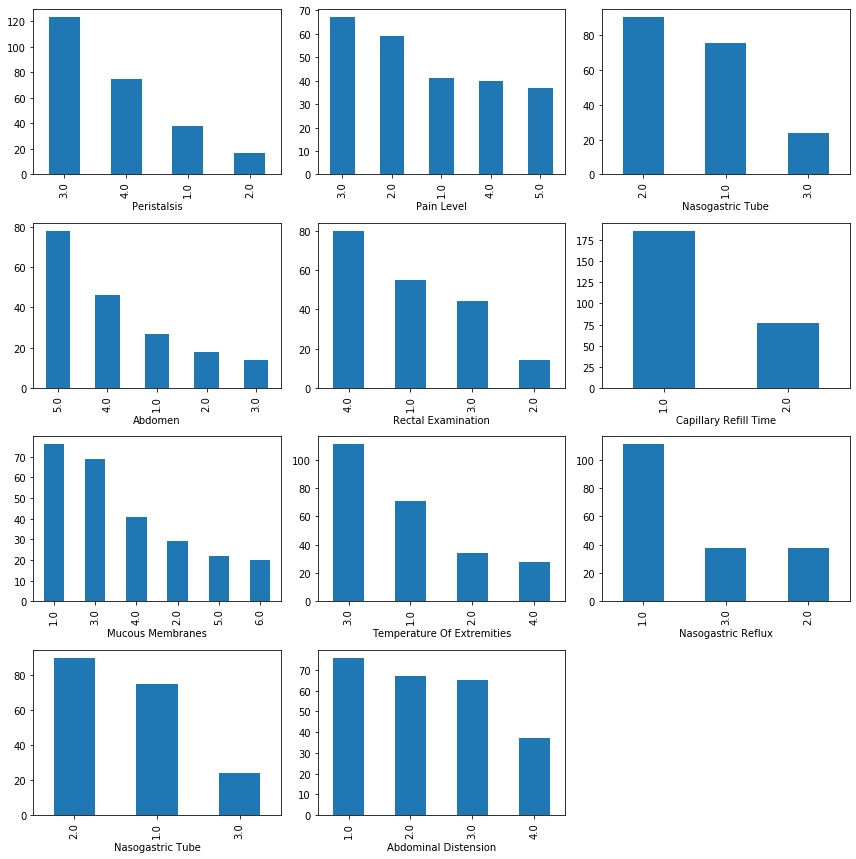

In [114]:
cat_fig = answer_four_a(X_train, categorical_list)

In [115]:
def answer_four_b(df, numerical_list):

    plt.figure(figsize=(12,12))
    df = df[numerical_list]
    for i in range(len(numerical_list)):

        plt.subplot(2,3,i+1)
        df[numerical_list[i]].plot.box()
        plt.xlabel(numerical_list[i])

    plt.tight_layout()

    return plt.gcf()

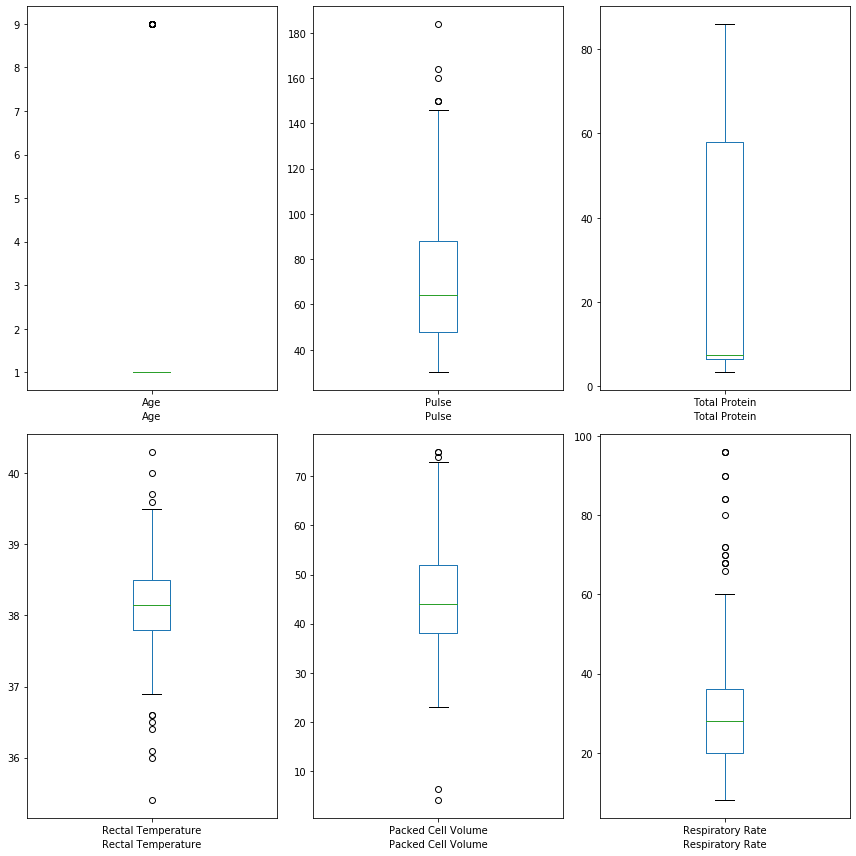

In [116]:
nume_fig = answer_four_b(X_train, numerical_list)

In [122]:
custom_step = False
def answer_five_custom():
    pass

if custom_step:
    X_train = answer_five_custom(X_train)
    X_test = answer_five_custom(X_test)

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def answer_five(numerical_list, categorical_list):

    numerical = ('numeric_transformer', 
            Pipeline([('NumScale', preprocessing.StandardScaler())]), numerical_list)
    categorical = ('categorical_transformer', 
                Pipeline([('SimpleImputer', SimpleImputer(strategy='most_frequent')),
                          ('OneHotEncoder',OneHotEncoder(handle_unknown='ignore'))]),  categorical_list)

    
                     
    co_transformer = ColumnTransformer([categorical, numerical]) 
            
    preprocessing_pipeline = Pipeline([('co_transformer', co_transformer),
                                       ('IterativeImputer', IterativeImputer(estimator=LinearRegression(),max_iter=10, tol=0.01))])
    return preprocessing_pipeline

In [128]:
pipe = answer_five(numerical_list,categorical_list)

X_train_p = pipe.fit_transform(X_train)
X_test_p = pipe.transform(X_test)

In [129]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

def evaluate(classifier, X_train, X_test, y_train, y_test, name = None):
    if name:
        print(name)
    print('Training Performance', classifier.score(X_train, y_train))
    print('Testing Performance', classifier.score(X_test, y_test))
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(classifier,X_test,y_test)
    plt.show()

baseline logistic regression
Training Performance 0.7517006802721088
Testing Performance 0.6756756756756757
              precision    recall  f1-score   support

           1       0.72      0.80      0.76        45
           2       0.59      0.56      0.57        18
           3       0.57      0.36      0.44        11

    accuracy                           0.68        74
   macro avg       0.63      0.57      0.59        74
weighted avg       0.67      0.68      0.67        74



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


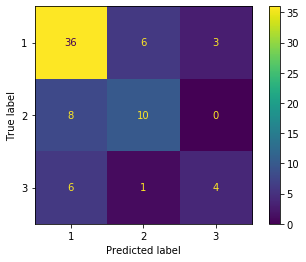


baseline random forest
Training Performance 0.9965986394557823
Testing Performance 0.7837837837837838
              precision    recall  f1-score   support

           1       0.79      0.98      0.87        45
           2       0.75      0.67      0.71        18
           3       1.00      0.18      0.31        11

    accuracy                           0.78        74
   macro avg       0.85      0.61      0.63        74
weighted avg       0.81      0.78      0.75        74



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


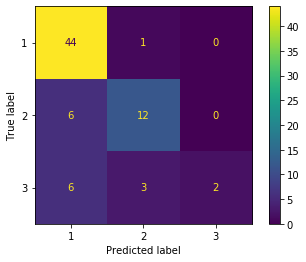

In [131]:
# Baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
rf = RandomForestClassifier()

lr.fit(X_train_p,y_train)
evaluate(lr, X_train_p, X_test_p, y_train, y_test, 'baseline logistic regression')
print()
rf.fit(X_train_p,y_train)
evaluate(rf, X_train_p, X_test_p, y_train, y_test, 'baseline random forest')

In [132]:
pipeline_prefix = '' 
classifier_param_list = [('logistic regression', 
                           LogisticRegression(max_iter=10000),
                          {pipeline_prefix+'C':np.logspace(-2,1.3,100)}),
                         ('random forest',
                           RandomForestClassifier(),
                          {pipeline_prefix+'n_estimators':[10,25,50,100],
                           pipeline_prefix+'max_depth':[3,5,8,10,None],
                           pipeline_prefix+'min_samples_split':np.arange(2,11),
                           pipeline_prefix+'min_samples_leaf':np.arange(1,5)}),
                        ]

In [133]:
from sklearn.model_selection import RandomizedSearchCV

# YOUR CODE HERE
def answer_six_main(classifier, params, X_train, y_train, n_iters_randomized_cv = 100):
    # Hint: Pass a smaller n_iters_randomized_cv parameter for debugging

    # Fill this function

    rscv = RandomizedSearchCV(estimator=classifier, param_distributions = params,
                               cv = 5, n_iter = n_iters_randomized_cv,n_jobs=-1, random_state=1)
    rscv.fit(X_train, y_train.values.ravel())
    
    return rscv

In [134]:
classifiers = {}
for item in classifier_param_list:
    print('Training', item[0])
    classifiers[item[0]] = answer_six_main(item[1],item[2], X_train_p, y_train)

Training logistic regression
Training random forest


In [135]:
print(classifiers['logistic regression'].best_estimator_)
print(classifiers['random forest'].best_estimator_)

LogisticRegression(C=0.054116952654646375, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


logistic regression
Training Performance 0.7380952380952381
Testing Performance 0.7297297297297297
              precision    recall  f1-score   support

           1       0.73      0.96      0.83        45
           2       0.67      0.44      0.53        18
           3       1.00      0.27      0.43        11

    accuracy                           0.73        74
   macro avg       0.80      0.56      0.60        74
weighted avg       0.75      0.73      0.70        74



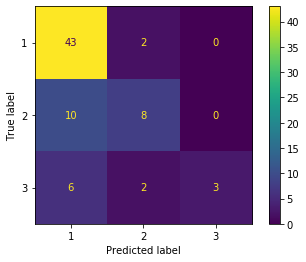

random forest
Training Performance 0.8809523809523809
Testing Performance 0.7162162162162162
              precision    recall  f1-score   support

           1       0.74      0.96      0.83        45
           2       0.60      0.50      0.55        18
           3       1.00      0.09      0.17        11

    accuracy                           0.72        74
   macro avg       0.78      0.52      0.52        74
weighted avg       0.75      0.72      0.67        74



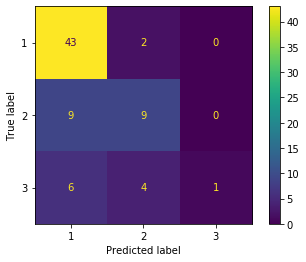

In [136]:
for item in classifier_param_list:
    evaluate(classifiers[item[0]], X_train_p, X_test_p, y_train, y_test, item[0])